In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
data=pd.read_csv('covid.csv')
data.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [4]:
le=preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)
Y=le.fit_transform(data['diagnosis'].values)
X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))

In [5]:
X

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [6]:
Y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [7]:
model=MultinomialNB()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [8]:
print("Acuuracy: ",accuracy_score(Y_test,Y_pred))

Acuuracy:  0.5714285714285714


In [9]:
print("Report: ")
print(classification_report(Y_test,Y_pred))

Report: 
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.75      0.60      0.67         5

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



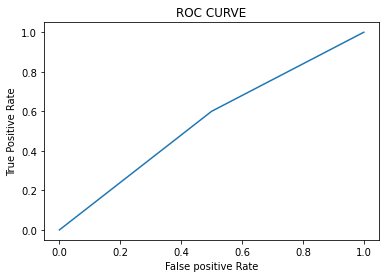

In [10]:
fpr,tpr,thresholds=metrics.roc_curve(Y_test,Y_pred,pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.show()